# Fraunhofer diffraction

Diffraction is the tendency of every wave to not follow straight propagation as it propagates or passes through an opening or obstacle.

This effect is basically the result of interferential processes and therefore is intimately related to the wave nature of light.

For its study we are going to make use of the ** Principle of Huygens-Fresnel **, it is necessary to emphasize that it is an approximation. For a complete treatment of diffraction we must turn to Maxwell's equations. However, the use of the Huygens-Fresnel principle will give us more than enough results. Said principle says the following:

* Each point of the wavefront can be assumed as a secondary center for emitting spherical waves. The total disturbance that arrives at another point later is the result of the interference of all those secondary waves. *

Let's consider the following situation: A monochromatic spherical wave from a point $ P_0 $ reaches an opening that we will denote by $ \Sigma $. We want to see what is the wave that reaches a point $ P $ located after the opening.

![Dif. General](generaldiff.svg)

The electric field in the opening will be due to the incident spherical wave,

$$E = \frac{E_0}{r} e^{i k r}$$

Now to calculate the electric field in $ P $, we first consider each surface element $ d \Sigma $ of the aperture as a spherical wave emitter center, and then we will add (or put another way, we will consider the interference) the contributions of all the surface elements to obtain the total electric field. The individual contribution of the surface element $ d \Sigma $ to the total field in $ P $ will be,

$$dE_p = \frac{E_0}{r} e^{i k r} \frac{e^{i k s}}{s} d\Sigma$$

In the previous expression we have simply written a spherical wave that propagates a distance $ s $ (hence the term $ \frac{e^{iks}}{s} $, as the excitation of this wave is due to another spherical wave incident, its amplitude will be $ \frac{E_0}{r} e^{ikr} d \Sigma $, that is, proportional to the chosen surface element.

Now, the total field will be calculated by adding all the contributions of the surface elements distributed by every aperture. That is to say,

$$E_p = \int_{\Sigma} \frac{E_0}{r s} e^{i k (r + s)} d\Sigma$$

Solving the previous integral will depend on the shape of the opening, and the distance $ s $ and $ r $ between the opening and the point $ P $ in which we want to calculate the field and the point $ P_0 $ source of the spherical wave incident in the opening. We are not going to see the general calculation, but we are going to focus on the approximation known as Fraunhofer regime (or diffraction). This approximation corresponds to the fact that the source $ P_0 $ and the observation point $ P $ are sufficiently far from the opening. From now on we will refer to the points $ P $ and $ P_0 $ for their Cartesian coordinates taking as origin the plane of the opening, which we will call $ (x, y, z) $ and $ (x_0, y_0, z_0) $ respectively. Also, the coordinates of a point in the opening will be denoted by $ (\chi, \eta) $.

We can show that the Fraunhofer regime can be obtained when it is fulfilled,

$$ min (z, z_0)> \frac {a^2} {\lambda} $$

where in the previous expression, $ z $ is the distance between the opening and $ P $, $ z_0 $ the distance between $ P_0 $ and the opening, $ a $ is the dimension of the opening, and finally $ \lambda $ is the wavelength of light.

One way to satisfy the previous requirement is to place the source $ P_0 $ and the observation point $ P $ at infinity effectively, that is, in the focal planes of two lenses located on both sides of the aperture.

Under this condition, it can be shown that the resulting field in $ P $ is given by the following expression,

$$ E_P = C \int_{\Sigma} E_0 (\chi, \eta) e^{i k (p \chi + q \eta)} d \chi d \eta $$

where we recall that $ \chi, \eta $ are the Cartesian variables in the plane of the opening (we are adding all the contributions of the surface elements in which we divide the opening). Further,
$$ p = \frac{x_0}{z_0} + \frac{x}{z} $$
Y
$$ q = \frac{y_0}{z_0} + \frac{y}{z} $$

The expression of $ E_P $ written in the above manner is nothing more than the Fourier transform of the field in the opening $ E_0 (\chi, \eta) $. If the aperture has a certain transmittance $ t (\chi, \eta) $, the field immediately after will be $ t (\chi, \eta) E_0 (\chi, \eta) $ and it will be this product that we have to introduce in the expression for $ E_P $.

## Fraunhofer diffraction. Rectangular opening.

In this case, making the previous integral, the resulting field in $ P $ that is obtained is,

$$ E_P (\theta) = E_0 \frac {sin(\beta)} {\beta} e^{i (k r_0 - \omega t)} $$

and the irradiance,

$$ I_P (\theta) = I_0 (\frac{sin (\beta)}{\beta}) ^ 2 $$

where in the previous expressions, $ \beta = k a sin (\theta) / 2 $. That is, the irradiance only depends on the angle $ \theta $ that subtends $ P $ seen from the center of the aperture.

In the case where the point $ P $ is in the focal plane of a lens with focal $ f '$, $ sin (\theta) \simeq and_P / f' $ for small angles and $ \beta = ka y_P / 2 f '$ If, on the other hand, we observe on a screen at a distance $ D $ much larger than the size of the aperture, $ \beta = ka y_P / 2 D $.

Let's see what form the previous function has. To observe the changes in the irradiance with the width of the slit or other parameters, the parameters of the code presented below can be modified.

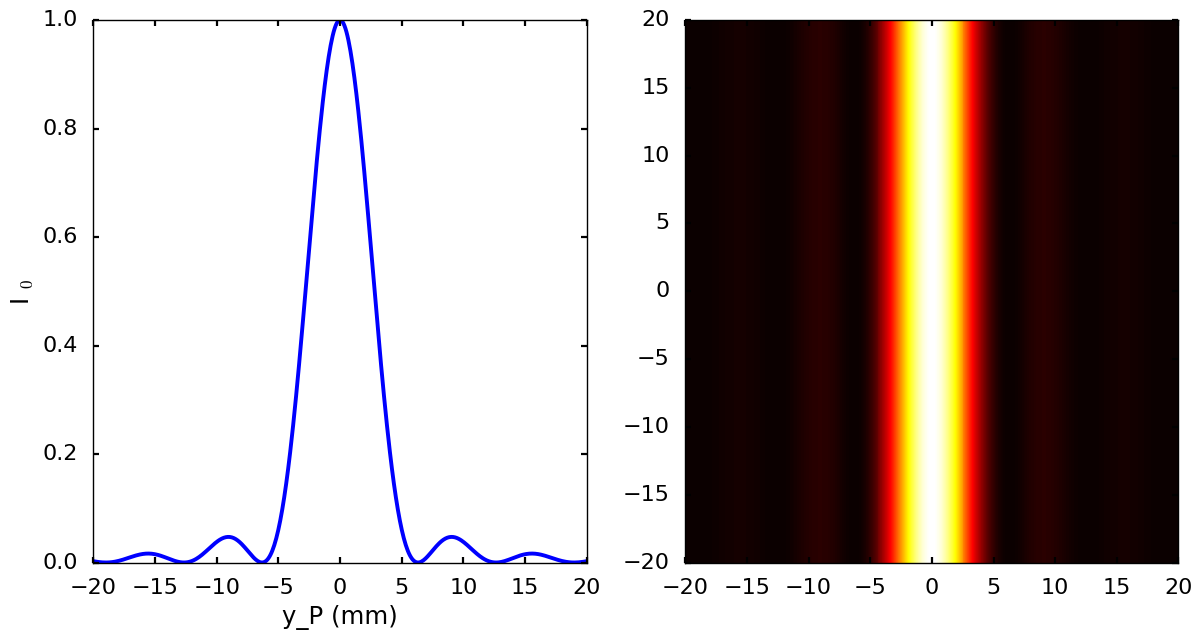

In [2]:
from numpy import *
from matplotlib.pyplot import *
% matplotlib inline
style.use ('seaborn-poster')

# Parameters
###########
Lambda = 632.8e-6 # wavelength of radiation in mm
focal = 500 # focal length of the lens in mm. We consider that we observe in the focal plane of a lens.
a = 0.05 # width of the slit in mm
############

k = 2.0 * pi / Lambda
yp = linspace (-20,20,500) # vector of positions on the screen in mm
beta = k * a * yp / (2.0 * focal)
I0 = 1 # in mW / cm ^ 2
IP = I0 * (sin (beta) / beta) ** 2

# In 2D
[X, Y] = meshgrid (yp, yp)
beta2 = k * a * X / (2.0 * focal)
IP2 = I0 * (sin (beta2) / beta2) ** 2
fig = figure (figsize = (14,7))
subplot (121)
plot (yp, IP)
xlabel ("y_P (mm)")
ylabel (r'I $ _0 $ ')
subplot (122)
pcolormesh (yp, yp, IP2, cmap = 'hot');

We have previously commented that the Fraunhofer diffraction was no more than the Fourier transform of the field in the aperture (rather, the field is proportional to the Fourier transform). Let's see this.

In the code presented below, a field is calculated in the opening. Since we assume that a flat wave arrives, the field in the aperture will be nothing more than a constant value for the points within the aperture and null in the points outside the aperture. In the code, this field is called * fieldinc *. Subsequently, the code uses the standard * fft * function to calculate the Fourier transform of that field. Finally, we represent the square of the absolute value of that transform, which must be proportional to the irradiance shown above.

We can see how the obtained function is equal to the one represented above. Although a more detailed analysis should take into account the transformation between the frequencies used in the code and the values *y* in the observation plane, we will not enter there. It is enough for the moment to exemplify the relation between the Fourier transform and the irradiance obtained in the Fraunhofer regime.

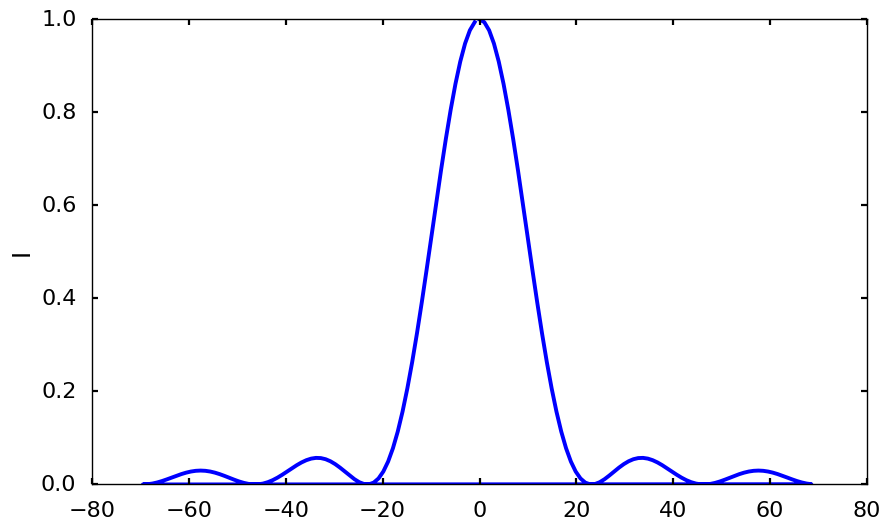

In [3]:
def fun(x):
    if(abs(x)<0.05/2):
        return 1.0
    else:
        return 0.0
    
y = linspace(-0.5,0.5,140)
funvec = vectorize(fun)
fieldinc = funvec(y)
from scipy.fftpack import fft, fftfreq
fig = figure(figsize=(10,6))
freq = fftfreq(y.shape[0],y[1]-y[0])
tffield = fft(fieldinc)
tffield2 = abs(tffield)**2/max(abs(tffield))**2
plot(freq,abs(fft(fieldinc))**2/max(abs(fft(fieldinc)))**2)
ylabel("I")


## Fraunhofer diffraction. Circular opening

In the case of a circular opening of diameter $ D_a $, the expression of the electric field at a point $ P $ that subtends an angle $ \theta $ with the axis, and under the approximation considered in the Fraunhofer regime is as follows,

$$ E (\theta) = C \frac{J_1 (k \frac{D_a} {2} sin (\theta))} {k \frac{D_a} {2} sin (\theta)} $$

and therefore the irradiance,

$$ I (\theta) = I_0 \left (\frac{J_1 (k \frac{D_a} {2} sin (\theta))} {k \frac{D_a} {2} sin (\theta)} \right) ^ 2 $$

This function is called * Airy * stain and it is fundamental to understand the formation of the image of optical systems including the wave nature of the light, as well as its resolving power.

If we observe the diffraction pattern on a screen located at a distance $ D $ from the aperture, and we call $ r $ a the distance from the observation point $ P $ to the axis of the optical system, we will have $ tan (\theta) = r / D $. On the other hand, if we consider that the angle subtended by the point $ P $ is small, $ sin (\theta) \simeq tan (\theta) = r / D $, being able to substitute the sine in the previous expressions for this quotient.

The shape of this function can be seen in the following figure.

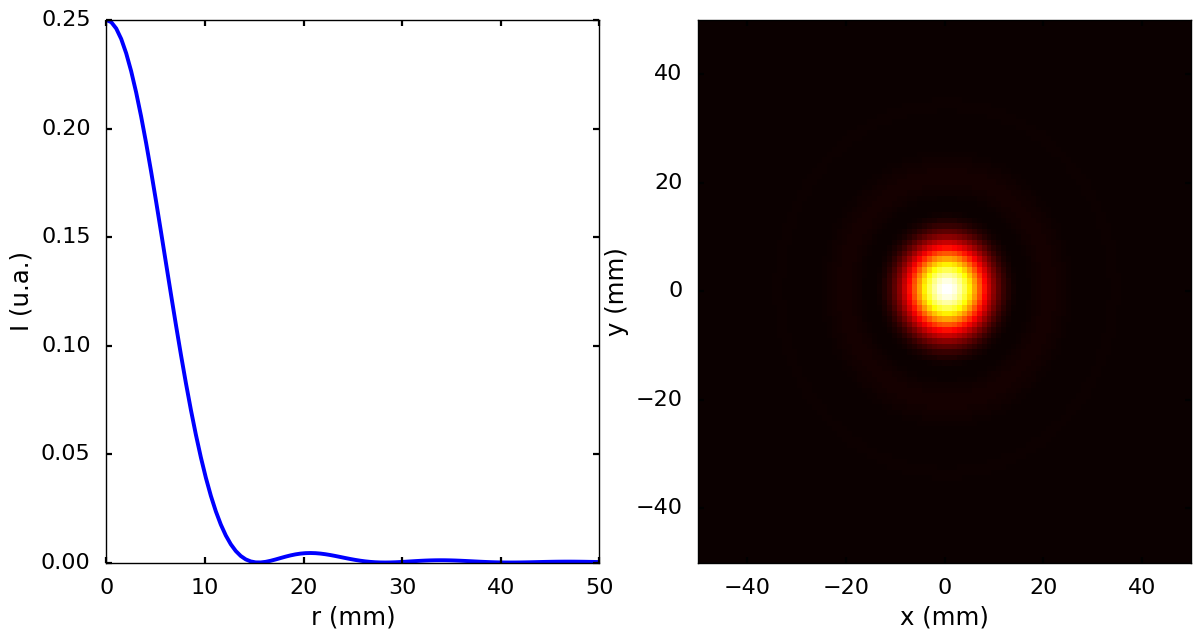

In [7]:
from scipy.special import j1

# Parameters
#############
Da = 0.1 # mm
D = 2000 # distance between the aperture and the observation screen
I0 = 1 # mW / cm ^ 2
############

r = linspace (0.001,50,100)
#Cut in 1D
fig = figure (figsize = (14,7))
subplot (121)
Icirc = I0 * (j1 (k * 0.5 * Da * r / D) / (k * 0.5 * Da * r / D)) ** 2
plot (r, Icirc)
xlabel ("r (mm)")
ylabel ("I (u.a.)");

#In 2D
x = linspace (-50,50,100)
[X, Y] = meshgrid (x, x)
R = sqrt (X ** 2 + Y ** 2)
Icirc2 = I0 * (j1 (k * 0.5 * Da * R / D) / (k * 0.5 * Da * R / D)) ** 2
subplot (122)
pcolormesh (x, x, Icirc2, cmap = 'hot')
xlabel ('x (mm)')
xlim ([- 50,50])
ylim ([- 50,50])
ylabel ('y (mm)');

We see that it has circular symmetry, and that the secondary maximums are much smaller in amplitude than the central peak, which means that practically all the energy is in the central maximum. To observe how the form of this function varies with the dimension of the opening, modify the parameter $ D_a $ in the previous code and execute it again.

## Resolution power of an optical system

Coming soon.